# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [59]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
from datetime import datetime 

In [4]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
browser.visit('https://static.bc-edx.com/data/web/mars_facts/temperature.html')

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html,'html.parser')

In [7]:
# Extract all rows of data
labels = soup.find_all()
rows = soup.find_all('tr',class_='data-row')
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
mars_data_2 = []
# Loop through the scraped data to create a list of rows
for row in rows:
    rows_1 = []
    data_1 = row.find_all('td')
    for i in data_1:
        rows_1.append(i.text)
    mars_data_2.append(rows_1)
columns = mars_data_2

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_data_df = pd.DataFrame(mars_data_2)
columns = [labels.text for labels in labels]

In [10]:
# Confirm DataFrame was created successfully
mars_data_df


,0,1,2,3,4,5,6
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [11]:
mars_data_df = mars_data_df.rename(columns={0: 'id', 1: 'terrestrial_date', 2: 'sol', 3: 'ls', 4: 'month', 5: 'min_temp', 6: 'pressure'})
mars_data_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
mars_data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [22]:
# Change data types for data analysis
mars_data_df = mars_data_df.astype({'id':int,'sol':int,'ls':int,'month':int,'min_temp':float,'pressure':float})

In [14]:
# Confirm type changes were successful by examining data types again
mars_data_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [23]:
# 1. How many months are there on Mars?
mars_calendar_year = len(mars_data_df['month'].unique())
mars_calendar_year

12

In [ ]:
# 2. How many Martian days' worth of data are there?


In [32]:
# 3. What is the average low temperature by month?
avg_low_temp_monthly = mars_data_df.groupby('month', as_index=False)['min_temp'].mean()
avg_low_temp_monthly

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


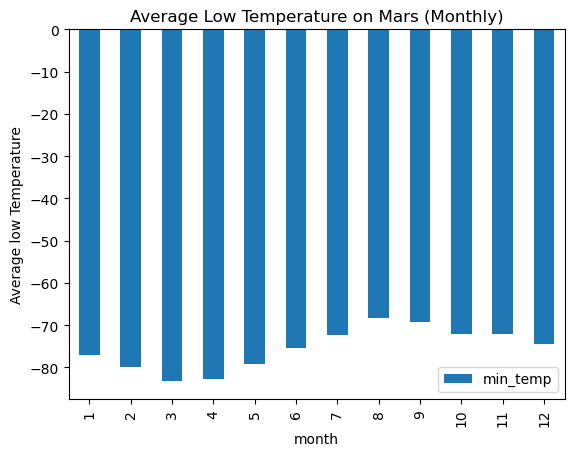

In [33]:
# Plot the average temperature by month
avg_low_temp_monthly.plot(kind='bar', x = 'month', y = 'min_temp')
plt.xlabel('month')
plt.ylabel('Average low Temperature')
plt.title('Average Low Temperature on Mars (Monthly)')
plt.tight_layout
plt.show()

In [38]:
# Identify the coldest and hottest months in Curiosity's location
min_temp_min = avg_low_temp_monthly['min_temp'].min()
min_temp_max = avg_low_temp_monthly['min_temp'].max()

hot_n_cold = avg_low_temp_monthly.loc[(avg_low_temp_monthly['min_temp'] == min_temp_min) | (avg_low_temp_monthly['min_temp'] == min_temp_max)]
hot_n_cold

,month,min_temp
2,3,-83.307292
7,8,-68.382979


In [40]:
# 4. Average pressure by Martian month
avg_martian_month_pressure = mars_data_df[['month', 'pressure']].groupby('month').mean().reset_index()
avg_martian_month_pressure

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


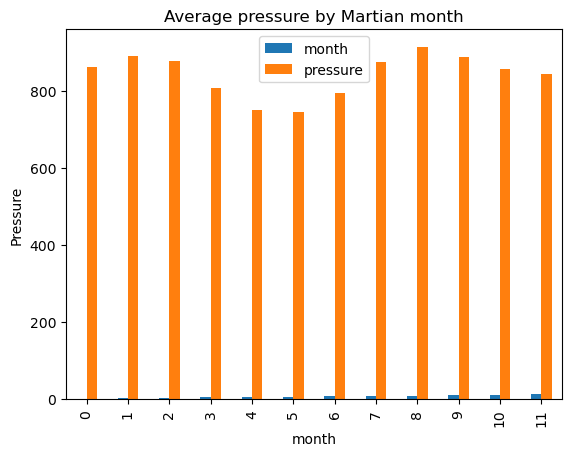

In [47]:
# Plot the average pressure by month
avg_martian_month_pressure.plot(kind= 'bar')
avg_martian_month_pressure
plt.xlabel('month')
plt.ylabel('Pressure')
plt.title('Average pressure by Martian month')
plt.tight_layout
plt.show()

   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0
Number of Martian days between the first and last date in July: 687


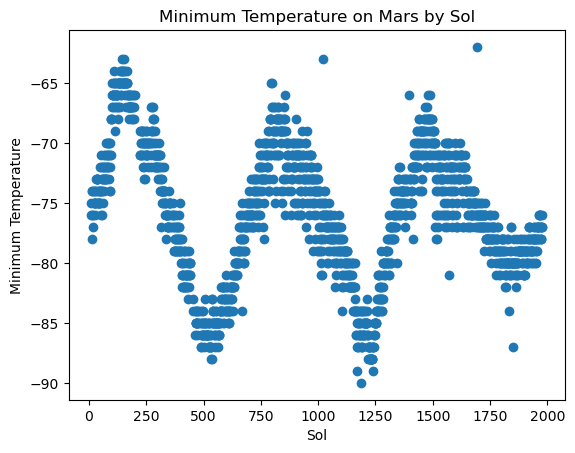

In [63]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Plot a line chart of minimum temperature by sol
# Display the first five rows of the DataFrame
print(mars_data_df.head())

# Scatter plot of minimum temperature by sol
fig, ax = plt.subplots()
ax.scatter(mars_data_df['sol'], mars_data_df['min_temp'])
ax.set_xlabel('Sol')
ax.set_ylabel('Minimum Temperature')
ax.set_title('Minimum Temperature on Mars by Sol')

# Calculate the number of Martian days between the first and last date in July
july = mars_data_df['terrestrial_date'][mars_data_df.month == 7]
date_1 = july.iloc[0]
date_2 = july[mars_data_df.sol > 500].iloc[0]
date_format = "%Y-%m-%d"

date_1_obj = datetime.strptime(date_1, date_format)
date_2_obj = datetime.strptime(date_2, date_format)
martian_days = (date_2_obj - date_1_obj).days


# Display the number of Martian days
print(f"Number of Martian days between the first and last date in July: {martian_days}")


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
mars_data_df.to_csv('mars_data.csv', index=False)

In [ ]:
browser.quit()